<a href="https://colab.research.google.com/github/zkysar/data-science-example/blob/main/Week_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture


## Using SVM on The Iris Dataset
The iris dataset is an extremely popular dataset for learning out machine learning techniques.

The dataset contains 3 classes that each correspond to a type of iris plant.

Each class has 50 data points and each data point consists of 4 features.

These features consent of the sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm.

Today we are going to use svm from the machine learning library, sklearn in order to predict what classes each iris data point belongs to.

Our goal is to pass the sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm in our svm model and have it predict one of the 3 classes of iris flower this data could belong to.

### Setup - Iris Dataset

- Download dataset from this link https://drive.google.com/file/d/1IfzhEBGuhwgdIyggePpqX4jOxFugB2cW/view?usp=sharing

- Upload iris.csv file to Google Colab

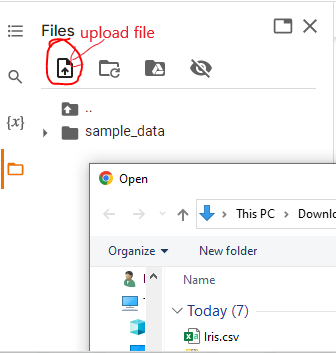

### Read Dataset

In [ ]:
from sklearn import svm

import pandas as pd

df = pd.read_csv("Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Prepare Data

Let’s take the "SepalLengthCm" , "SepalWidthCm", "PetalLengthCm", and "PetalWidthCm" and separate them into a smaller data frame. So that we can use them to train our model

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now let's do the same thing, but for the species of flower.

In [ ]:
Y = df[['Species']]
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Label Encoder
Now before we train our model we have to encode the species data into numerical values. The way that the species data is currently stored is a text string value. However, the machine learning model needs the data to be a numerical value, so to do this we will use a library called label encoder.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

yEncoded = le.fit_transform(Y['Species'])

Note that we pass in Y[‘Species’] instead of just Y. This is because the le.fit_transform function is expecting a list and not the whole dataframe.Y[‘Species’] will return the values underneath the column labeled species.

If we print yEncoded the following values will be returned numerical data. The text species data has been encoded as numerical data

In [ ]:
print(yEncoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Train Model

In [ ]:
irisPredictionModel = svm.SVC()

irisPredictionModel.fit(X, yEncoded)

SVC()

Now that our model is trained lets go try to predict a flower. We'll try to predict a flower with SepalLengthCm of 4.9 , SepalWidthCm of 3 , PetalLengthCm of 1.4 , and a PetalWidthCm of .2

In [ ]:
prediction = irisPredictionModel.predict([[ 4.9, 3, 1.4, .2]] )

print(prediction)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


### Decode 
Now our final step will be to translate the encoded number back to its corresponding value.

In [ ]:
returnToOrginal = le.inverse_transform(prediction)

print(returnToOrginal)

['Iris-setosa']


### Class exercise

Try predicting different numbers for the sepal length and width as well as the petal length and observe the model pick different classifications.

## Random Forest

### Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
irisRandomModel = RandomForestClassifier()

irisRandomModel.fit(X, yEncoded)

RandomForestClassifier()

Now that our model is trained lets go try to predict a flower. We'll try to predict a flower with SepalLengthCm of 4.9 , SepalWidthCm of 3 , PetalLengthCm of 1.4 , and a PetalWidthCm of .2

In [ ]:
prediction = irisRandomModel.predict([[ 4.9, 3, 1.4, .2]] )

print(prediction)

NameError: ignored

## Rock, Paper, Scissors



### Random Choices

First, let’s build a basic RPS program where we will compete against a computer picking random.

This program will just have us taking a user’s input to pick between 1) rock 2) paper or 3) scissors.

On the computer’s side, it will just pick a random choice.

In [ ]:
import random
def input_choices():
  comp = random.randint(1,3)
  user = int(input("Please enter a number: 1) Rock 2) Paper or 3) Scissors"))
  print('comp:', comp)
  return comp, user

Then, we simply check the inputs for each possible case (win, loss, or tie for each choice)

In [ ]:
def who_wins(comp,user):
  if comp == 1 and user == 1:
    print("It’s a tie!")
  elif comp == 1 and user == 2:
    print("The user wins!")
  elif comp == 1 and user == 3:
    print("The comp wins!")   
  elif comp == 2 and user == 1:
    print("The comp wins!")
  elif comp == 2 and user == 2:
    print("It’s a tie!")
  elif comp == 2 and user == 3:
    print("The user wins!")
  elif comp == 3 and user == 1:
    print("The user wins!")
  elif comp == 3 and user == 2:
    print("The comp wins!")
  elif comp == 3 and user == 3:
    print("It’s a tie!!")

#### Loops
Lastly, let’s just add a for loop for the game to run multiple times. Putting all of the previous code inside of the for loop, the loop would look like the following

In [ ]:
for i in range(10):
  print('Game', i+1)
  comp, user = input_choices()
  who_wins(comp,user)

Game 1
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 2
The comp wins!
Game 2
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 1
It’s a tie!
Game 3
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 1
It’s a tie!
Game 4
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 3
The user wins!
Game 5
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 3
The user wins!
Game 6
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 3
The user wins!
Game 7
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 2
The comp wins!
Game 8
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 1
It’s a tie!
Game 9
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 1
It’s a tie!
Game 10
Please enter a number: 1) Rock 2) Paper or 3) Scissors1
comp: 2
The comp wins!


### AI Model
When playing this game, what is the chance I (or the computer) would win? Since both of us would essentially be picking at random, we would each have a ⅓ chance of winning (33.3%). That is not a very efficient AI player.

If we take a collection of our previous match history, we can use that with our machine learning model to predict the next moves. For example, if the computer looks at our previous 5 games it can use that data to predict the 6th game. Of the models we have learned so far, which do you think would be most optimal?

While many would work, let’s start by using SVM. By classifying our prediction of the user into one of the 3 options, the AI can just choose the option that let’s them win!

Let’s use our regular Rock Paper Scissors game as the base and add our machine learning into it.

First, let’s import the proper library. Next, we will need to set up the initial design for our AI. What will the AI use to predict the opponent’s next move? Let’s try using their previous moves. By setting up the history of what the opponent has chosen, we can predict what they may throw next. If they have certain player habits or patterns they use (whether intentionally or not) our AI should be able to adapt to them.

In [ ]:
from sklearn import svm 
history = [1,1,3,2]

We are going to use the last 2 choices the user has made as our predictor. We have filled in 4 random choices, though, just so that we can get started with the program.

Next, let us set up our input and output data. As mentioned above, we are going to take in the previous user choices as our input. We will then predict what they are going to throw next. This will be our output.

In [ ]:
input_data = [  
[1,1], # [history[0],history[1]]
[1,3], # [history[1],history[2]]
[3,2], # [history[2],history[3]]
[2,1]] # [history[3],history[0]]

#predict what they are going to throw next
output_data = [3,2,1,1]  # [history[2],history[3],history[0],history[1]]

These are simply some player habits we came up with. For example, we are setting up our initial data to state that if they just did rock twice (1,1) then they are likely to throw scissors next (3). Or, if they just did scissors and then paper (3,2) they are likely to throw rock next (1)!



#### Train Model

Once we have established our input and output training data we can create/fit our model.

In [ ]:
model = svm.SVC()

model.fit(input_data, output_data)

SVC()

#### Player 2

Next, let’s set up the player choosing from rock, paper, or scissors! We can make this into a function so that if we need to change things we can easily do so. Since the player isn’t the focus of the project, they will be player 2 while the computer is player 1.

In [ ]:
def getPlayer2():
	choice = int(input("Please select one of the following 1) Rock, 2) Paper, 3) Scissors: "))
	return choice

#### Player 1

For the AI’s guess we are going to use the user’s two most recent games (choices) as our input to predict. These 2 games are simply the two most recent values in our "history" list. Our model will then give us a prediction of what the opponent will play. The AI will then take that answer and play what beats its prediction.

This function will return what the AI has chosen for its turn. It has used the player’s most recent 2 games as input data and predicted what it thinks the player will play (current). It then chooses the counter to that move!

(Note, the "0" added will simply remove any decimals we may get back. If we use a model such as linear regression, we may not always get back 1, 2, or 3. We may sometimes get 1.23, for example)

In [ ]:
def getPlayer1():
	data_record = [history[-2], history[-1]]
	current = model.predict([data_record])[0]
	if current == 1:
		return 2
	elif current == 2:
		return 3
	else:
		return 1

#### Play game





Afterwards, let’s set up some variables to keep track of the game. We can just record the number of wins, ties, and losses.

Now we can move on to changing/ upgrading our for loop! Let’s change the amount of games from 10 to 20 so that we can more accurately see the AI adapt to any patterns. Next, since we have the functions for both the user and AI returning their choices, we can simply call those and set them to our variables we have already. Then, let us tally up the correct wins and losses based on the correct result! All of these changes will have the for loop looking something like the following.

In [ ]:
wins_player1 = 0
wins_player2 = 0
total_ties = 0

for i in range(20):
  print("Game: ", i+1)
  comp = getPlayer1()
  user = getPlayer2()
  print("Computer: ", comp, "vs Player: ", user)
  if comp == 1 and user == 1:
    print("It’s a tie!")
    total_ties += 1

  elif comp == 1 and user == 2:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 1 and user == 3:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 2 and user == 1:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 2 and user == 2:
    print("It’s a tie!")
    total_ties += 1
  elif comp == 2 and user == 3:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 3 and user == 1:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 3 and user == 2:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 3 and user == 3:
    print("It’s a tie!!")
    total_ties += 1

Game:  1
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 1
Computer:  2 vs Player:  1
The comp wins!
Game:  2
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 1
Computer:  2 vs Player:  1
The comp wins!
Game:  3
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 3
Computer:  2 vs Player:  3
The user wins!
Game:  4
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 2
Computer:  2 vs Player:  2
It’s a tie!
Game:  5
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 3
Computer:  2 vs Player:  3
The user wins!
Game:  6
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 1
Computer:  2 vs Player:  1
The comp wins!
Game:  7
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 1
Computer:  2 vs Player:  1
The comp wins!
Game:  8
Please select one of the following 1) Rock, 2) Paper, 3) Scissors: 3
Computer:  2 vs Player:  3
The user wins!
Game:  9
Please select one of the following

Once we have everything else ready, we will move on to the final part of the project: making the machine learning model adapt as the game goes on.

As the game progresses we want the model to be able to see the patterns/habits of the player. To do this, we will need to update our model. If we add the user’s most recent move to their history, we can then add more data to our input and output, which trains our model. By taking the 3rd and 2nd most recent game as our input, we can see what the actual result would be from the 1st most recent game. Just like we did when we came up with patterns in our input and output data, we are getting live results as to what the player will commonly choose after having chosen for the previous 2 games.

We should also provide a message to show that the training model is being updated. This all comes together to look like the following.

In [ ]:
print("Updating the training model...")
history.append(user)
input_data.append([history[-3], history[-2]])
output_data.append(history[-1])
model.fit(input_data,output_data)
print("Finished updating the training model")

Updating the training model...
Finished updating the training model


By continuously updating our model with real data, we can get the most accurate prediction of what the player will choose. As the AI adapts it will more precisely be able to guess what the player will do next. This update will take place inside the loop after every game is played.

Lastly, let us print out the results of all the games!

In [ ]:
print("Computer: ", wins_player1)
print("Player: ", wins_player2)
print("Total ties: ", total_ties)

Computer:  10
Player:  6
Total ties:  4


#### All code together

Our Rock,Paper, Scissors AI is now complete, try playing against it! To test it simply choose some patterns and watch as it adapts to your gameplan. Choosing 1 over and over, or even 1, 2, and then 3, will be recognized by the computer and beaten!

In [ ]:
input_data = [  
[1,1], # [history[0],history[1]]
[1,3], # [history[1],history[2]]
[3,2], # [history[2],history[3]]
[2,1]] # [history[3],history[0]]

#predict what they are going to throw next
output_data = [3,2,1,1]  # [history[2],history[3],history[0],history[1]]

model = svm.SVC()
model.fit(input_data, output_data)

wins_player1 = 0
wins_player2 = 0
total_ties = 0

for i in range(20):
  print("Game: ", i+1)
  comp = getPlayer1()
  user = getPlayer2()
  print("Computer: ", comp, "vs Player: ", user)
  if comp == 1 and user == 1:
    print("It’s a tie!")
    total_ties += 1
    
  elif comp == 1 and user == 2:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 1 and user == 3:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 2 and user == 1:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 2 and user == 2:
    print("It’s a tie!")
    total_ties += 1
  elif comp == 2 and user == 3:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 3 and user == 1:
    print("The user wins!")
    wins_player2 += 1
  elif comp == 3 and user == 2:
    print("The comp wins!")
    wins_player1 += 1
  elif comp == 3 and user == 3:
    print("It’s a tie!!")
    total_ties += 1
  print("Updating the training model...")

  history.append(user)
  input_data.append([history[-3], history[-2]])
  output_data.append(history[-1])
  model.fit(input_data,output_data)
  print("Finished updating the training model")

print("Computer: ", wins_player1)
print("Player: ", wins_player2)
print("Total ties: ", total_ties)

# Assignment

## Task 1
1. Our program is already very robust, but we can always improve and customize things. First and foremost, we can choose an entirely different model. What model do you think would be best for this problem? Look up some new models online. Are there any for sklearn that you could possibly use? For example, the Passive Aggressive classifier can be used. Train at least 2 different models.

https://scikit-learn.org/stable/modules/classes.html

**Note: Search for the word "Classifier" and do not add anything between parentheses Eg. RandomForestClassifier(max_depth=2, random_state=0) => RandomForestClassifier() **

2. Choose what you believe is the most optimal model (that may still be SVM)





## Task 2

Next, let’s modify how many games we are using for our predictions. Select a number of games to use. In the lesson, we use  the last 2  elements in the history. Be aware, when making changes to this, you will need to modify many areas of the code. We will go through many of those below. First, customize the history to start with predictions you believe make sense by increasing the number of elements and values. For example, you could change them all to just predict simple patterns 1,1,1,1.

## Task 3

As we are modifying the number of games we wish to predict with, let us now improve the getPlayer1() function. Where we are recording the 2 most recent games (-1 and -2) increase it to the number you have selected. For example, if we wanted 3 games, it would become 

    data_record = [history[-3], history[-2], history[-1]]

## Task 4 

Go to the line in which you initialize the "input_data" and change the value. For example, we have the 

    history = [1,1,1,1,3,2,2,...] 

and we want the "data_record" to be 3 games then we need to change the 

    input_data = [[1,1,1],[1,1,1],[1,1,3],[1,3,2]...]
    
By doing all of this, we have now successfully modified our program to take in the last three games as predictors instead of just 2.

##Task 5

Just as we modified the getplayer1() function above, modify the area we are updating the training model. For example, if we wanted 3 games now, the code would become 

    input_data.append([history[-4], history[-3], history[-2]])

## Task 7
Lastly, replace the value of the "output_data".  For example, if 

    history = [1,1,1,1,3,2,2,...] 
    input_data = [[1,1,1],[1,1,1],[1,1,3],[1,3,2]...] 
    
then 

    output_data = [1,3,2,2...] 

## Task 8

Test the program 